In [18]:
import numpy as np
from hmmlearn import hmm


model = hmm.GaussianHMM(n_components=3, covariance_type="full")

model.startprob_ = np.array([0.6, 0.3, 0.1])

model.transmat_ = np.array([[0.7, 0.2, 0.1], [0.3, 0.5, 0.2], [0.3, 0.3, 0.4]])

model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])

model.covars_ = np.tile(np.identity(2), (3, 1, 1))

feature_matrix, state_sequence = model.sample(1000)


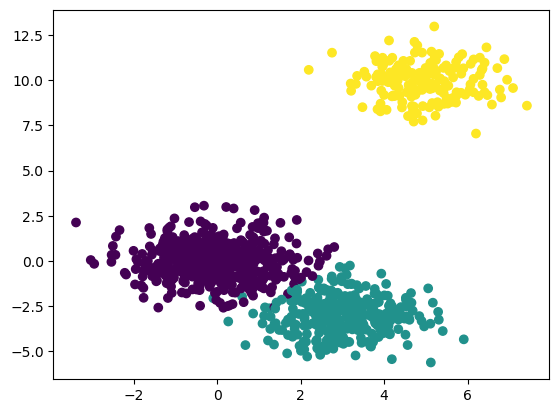

In [19]:
import matplotlib.pyplot as plt

plt.scatter(feature_matrix[:, 0], feature_matrix[:, 1], c=state_sequence)


In [45]:
remodel = hmm.GaussianHMM(
    n_components=3, covariance_type="full", init_params="", params="t", implementation="scaling", n_iter=0, tol=1E-6
)
remodel.startprob_ = np.array([0.6, 0.3, 0.1])
remodel.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
remodel.covars_ = np.tile(np.identity(2), (3, 1, 1))

remodel.fit(feature_matrix)

remodel.transmat_


array([[0.0778981 , 0.20676928, 0.71533262],
       [0.11268089, 0.71654739, 0.17077172],
       [0.38556322, 0.48491803, 0.12951875]])

In [27]:
remodel.transmat_ - model.transmat_


array([[-0.63543647, -0.19974072,  0.83517719],
       [ 0.29451584, -0.49414096,  0.19962512],
       [-0.28700195,  0.1535604 ,  0.13344155]])

In [24]:
remodel.monitor_.converged

True

In [25]:
remodel.score(feature_matrix)

-3716.8066946598215